# Visualization of M&M output

A prototype to plot various M&M output information.

## Load a sample M&M output data-set

In [1]:
result_file = 'small_data_100_mixture01_1_oracle_generator_1_mnm_mixture01_1.rds'
meta_file = 'small_data_100_mixture01_1.pkl'

In [2]:
dat = readRDS(result_file)$result
names(dat)

[1] "alpha"           "mu"              "mu2"             "KL"             
 [5] "lbf"             "sigma2"          "V"               "elbo"           
 [9] "niter"           "fitted"          "coef"            "null_index"     
[13] "mixture_weights" "intercept"       "sets"            "pip"            
[17] "m_init"

## SuSiE plot

We can directly call SuSiE plot function. Since it is simulated data we can add the true causal effects to it.

In [3]:
truth = dscrutils::read_dsc(meta_file)$meta$true_coef
true_pos = as.integer(apply(truth, 1, sum) != 0)
true_idx = which(truth != 0, arr.ind = TRUE)
true_idx

row,col
149,1
394,1
786,1
149,2
394,2
786,2
149,3
394,3
786,3
149,4


In [4]:
truth[true_idx]

[1]  0.41189928  0.41189928  0.41189928  0.39345018  0.39345018  0.39345018
 [7]  0.08806096  0.08806096  0.08806096 -0.07230793 -0.07230793 -0.07230793
[13]  0.05004165  0.05004165  0.05004165

In [5]:
pdf('susie_plot_demo.pdf', width=10, height=5)
susieR::susie_plot(dat,y='PIP', main = 'Default SuSiE plot for cross-condition PIP', xlab = 'SNP positions', add_legend = T, b=true_pos)
dev.off()

png 
  2

> susie_plot_demo.pdf (11.0 KiB):

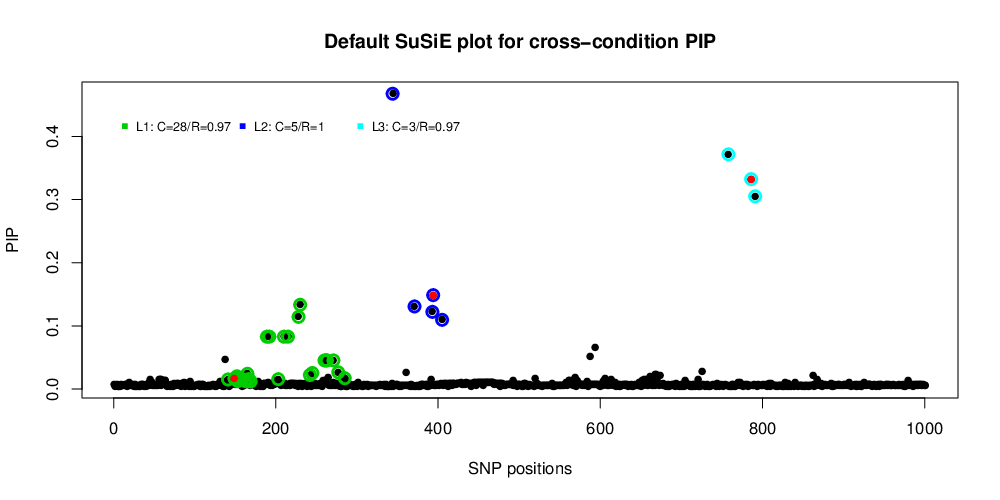

In [6]:
%preview susie_plot_demo.pdf -s png --dpi 100

## Bubble plot for estimated effect size

Effect size will be the color of the bubble:

In [7]:
dim(dat$coef[-1,]) # remove intercept

[1] 1001    5

PIP will be the size of the bubble:

In [8]:
cond_pip = mmbr::mmbr_get_pip_per_condition(dat, dat$m_init)
dim(cond_pip)

[1] 1001    5

In [9]:
dat$alpha[,c(149,394,786)]

1.222101e-02,4.685408e-22,4.867315e-22
1.329052e-18,1.449352e-01,1.341495e-18
8.447406e-17,7.957771e-17,3.293492e-01
6.533748e-04,6.382051e-04,6.487285e-04
6.537123e-04,6.385829e-04,6.490915e-04
6.537294e-04,6.385758e-04,6.490911e-04
6.535125e-04,6.382878e-04,6.488256e-04
6.532115e-04,6.378966e-04,6.484634e-04
6.529780e-04,6.375808e-04,6.481744e-04
6.529267e-04,6.374745e-04,6.480863e-04


Now get table of effect size estimates and PIP, for all conditions.

In [10]:
table = data.frame(matrix(NA, prod(dim(cond_pip)), 5))
colnames(table) = c('y', 'x', 'effect_size', 'pip', 'cs')

In [11]:
x_names = paste('variable', 1:nrow(cond_pip))
y_names = paste('condition', 1:ncol(cond_pip))
table$y = rep(y_names, length(x_names))
table$x = rep(x_names, each = length(y_names))
table$effect_size = as.vector(dat$coef[-1,])
table$pip = as.vector(cond_pip)
head(table)

y,x,effect_size,pip,cs
condition 1,variable 1,-7.276723e-08,0.003069809,NA
condition 2,variable 1,-1.476321e-08,0.002189100,NA
condition 3,variable 1,-2.354022e-08,0.002330131,NA
condition 4,variable 1,-2.449357e-07,0.004035745,NA
condition 5,variable 1,-4.029866e-08,0.002277351,NA
condition 1,variable 2,-4.029866e-08,0.002277351,NA


Now add CS to this table.

In [12]:
for (i in dat$sets$cs_index) {
    variables = x_names[dat$sets$cs[[i]]]
    table[which(table$x %in% variables),]$cs = i
}
table = table[which(!is.na(table$cs)),]

In [13]:
dim(table)
table[which(table$cs==1),]

[1] 180   5

,y,x,effect_size,pip,cs
1716,condition 1,variable 344,3.496002e-08,0.002216022,1
1717,condition 2,variable 344,5.115692e-08,0.003102110,1
1718,condition 3,variable 344,1.815800e-08,0.002252564,1
1719,condition 4,variable 344,1.065014e-07,0.003226755,1
1720,condition 5,variable 344,5.308603e-08,0.003064365,1
1851,condition 1,variable 371,1.060740e-08,0.002729667,1
1852,condition 2,variable 371,4.338759e-08,0.002288875,1
1853,condition 3,variable 371,-1.260157e-08,0.002091571,1
1854,condition 4,variable 371,5.235178e-08,0.002355021,1
1855,condition 5,variable 371,1.499557e-08,0.002124148,1


In [14]:
rects = NULL
j = 1
for (i in unique(table$cs)) {
    x_involved = which(table$cs == i)
    line = c(min(x_involved), max(x_involved), letters[j])
    if (j == 1) rects = line
    else rects = rbind(rects, line)
    j = j + 1
}
colnames(rects) = c('xstart', 'xend', 'col')
rownames(rects) = NULL
rects = data.frame(rects)

In [15]:
rects

xstart,xend,col
1,140,a
141,165,b
166,180,c


In [16]:
library(ggplot2)
pdf('bubble_demo.pdf', width = length(unique(table$x)) * 0.5, height = length(unique(table$y)) * 0.9)
p = ggplot(table) + 
    geom_point(aes(x = x, y = y, colour = effect_size , size = pip)) +
    #geom_rect(data=rects, aes(ymin=-Inf, ymax=Inf, xmin=-Inf, xmax=Inf, fill=alpha("grey",0), colour = col), alpha=0.5) +
#   geom_point(data = atac_seq_table[which(atac_seq_table$sig == 1), ], aes(x = gwas, y = anno), size = 8, shape = 1) + 
    scale_x_discrete(limits = unique(table$x)) + 
    scale_y_discrete(limits = unique(table$y)) + 
    scale_color_gradient2(midpoint = 0, limit = c(-max(abs(table$effect_size)), max(abs(table$effect_size))), low="#022968", mid="white", high="#800000", space="Lab") + 
    theme_minimal() + theme(text = element_text(face = "bold", size = 14), panel.grid = element_blank(), 
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1), 
        axis.title.x = element_blank(), 
        axis.title.y = element_blank(),
        axis.text = element_text(size = 15, color = "black"))
print(p)
dev.off()

png 
  2

> bubble_demo.pdf (7.0 KiB):

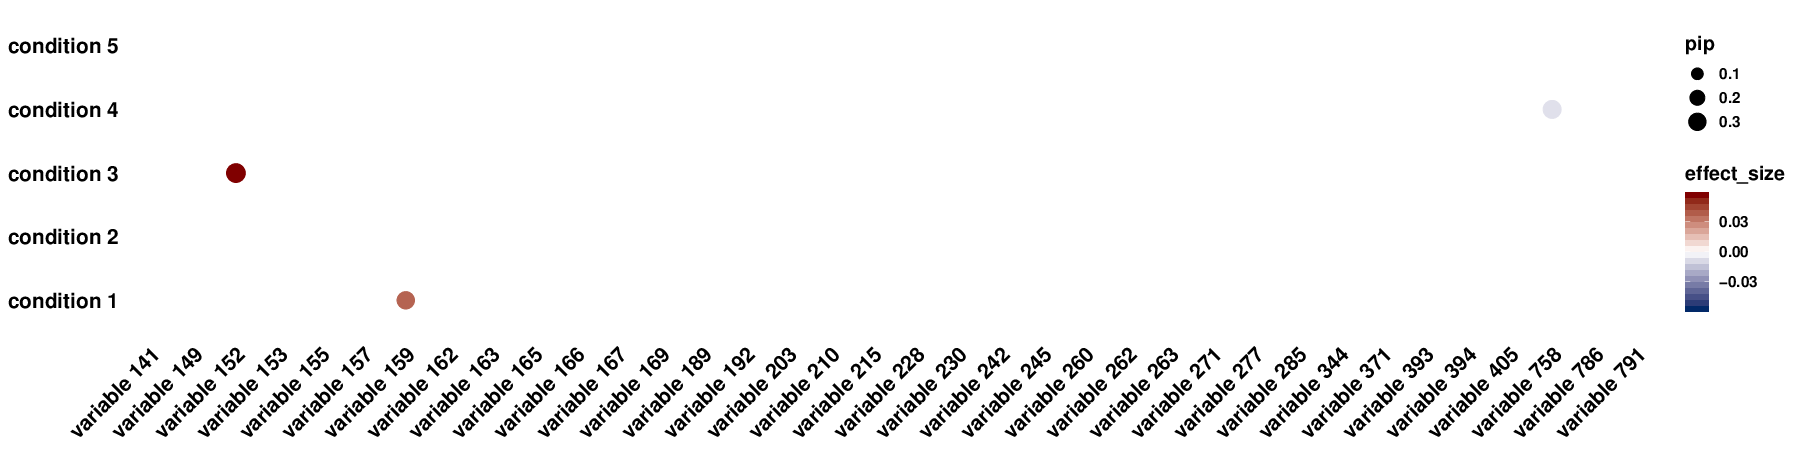

In [17]:
%preview bubble_demo.pdf -s png --dpi 100